In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
from scipy.optimize import curve_fit 
import numpy as np

file_path = "/Users/mebowen/Desktop/Mattie/"

bias = []
for i in range(1,10):
    bias.append(fits.getdata(file_path + "mBias0000000{}.fit".format(i) , ext=0).astype(np.int))
bias.append(fits.getdata(file_path + "mBias00000010.fit" , ext=0).astype(np.int))

In [2]:
flat = []
for i in range(11,21):
    flat.append(fits.getdata(file_path + "mFlatField000000{}.fit".format(i) , ext=0).astype(np.int))

In [3]:
#taking the mean and variance of the biases
mean_bias = np.asarray(bias).mean(axis=0)
var_bias = np.asarray(bias).var(axis=0)


## subtracting average of bias frame from each flat
f_sub_bias = [f - mean_bias for f in flat]


#taking the mean and variance of the flats
mean_flat = np.asarray(f_sub_bias).mean(axis=0)
var_flat = np.asarray(f_sub_bias).var(axis=0)

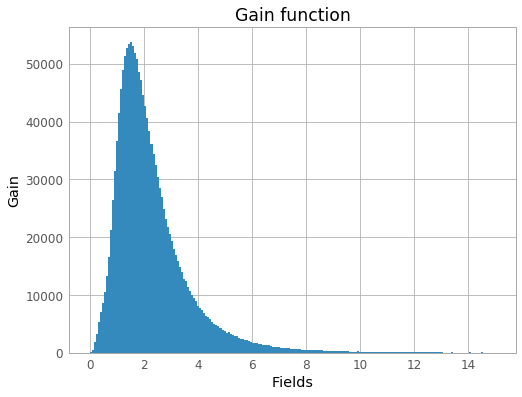

(array([20]),)
Value for maximum gain = [ 1.5]


In [4]:
#make a gain frame
gain = mean_flat/var_flat

#make a histogram
n, b, Gains = plt.hist(gain.flatten(),bins=200,range=(0,15))
plt.title("Gain function")
plt.ylabel("Gain")
plt.xlabel("Fields")
plt.show()

gain_max = np.where(n == n.max())
print(gain_max)
print("Value for maximum gain =",b[gain_max])

In [5]:
read_noise = var_bias.mean()
print(read_noise)

34.151102326


# Linearity

In [6]:
file_path2 = "/Users/mebowen/Desktop/Team2Awesome/"
file_path4 = "/Users/mebowen/Desktop/Group4/"
file_path5 = "/Users/mebowen/Desktop/Team5/"
file_path6 = "/Users/mebowen/Desktop/TeamNot6/"
file_pathS = "/Users/mebowen/Desktop/Sharknado/"
file_pathT = "/Users/mebowen/Desktop/Trogo/"


bias2 = []
for i in range(1,10):
    bias2.append(fits.getdata(file_path2 + "ABias0000000{}.fit".format(i) , ext=0).astype(np.int))
bias2.append(fits.getdata(file_path2 + "ABias00000010.fit" , ext=0).astype(np.int))


bias4 = []
for i in range(1,10):
    bias4.append(fits.getdata(file_path4 + "aBias0000000{}.fit".format(i) , ext=0).astype(np.int))
bias4.append(fits.getdata(file_path4 + "aBias00000010.fit" , ext=0).astype(np.int))


bias5 = []
for i in range(1,10):
    bias5.append(fits.getdata(file_path5 + "kBias0000000{}.fit".format(i) , ext=0).astype(np.int))
bias5.append(fits.getdata(file_path5 + "kBias00000010.fit" , ext=0).astype(np.int))


bias6 = []
for i in range(1,10):
    bias6.append(fits.getdata(file_path6 + "QBias0000000{}.fit".format(i) , ext=0).astype(np.int))
bias6.append(fits.getdata(file_path6 + "QBias00000010.fit" , ext=0).astype(np.int))


biasS = []
for i in range(1,10):
    biasS.append(fits.getdata(file_pathS + "SBias0000000{}.fit".format(i) , ext=0).astype(np.int))
biasS.append(fits.getdata(file_pathS + "SBias00000010.fit" , ext=0).astype(np.int))


biasT = []
for i in range(1,10):
    biasT.append(fits.getdata(file_pathT + "TBias0000000{}.fit".format(i) , ext=0).astype(np.int))
biasT.append(fits.getdata(file_pathT + "TBias00000010.fit" , ext=0).astype(np.int))

##############################################################################################

flat2 = []
for i in range(11,21):
    flat2.append(fits.getdata(file_path2 + "AFlatField000000{}.fit".format(i) , ext=0).astype(np.int))


flat4 = []
for i in range(11,21):
    flat4.append(fits.getdata(file_path4 + "aFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    
    
flat5 = []
for i in range(11,21):
    flat5.append(fits.getdata(file_path5 + "kFlatField000000{}.fit".format(i) , ext=0).astype(np.int)) 
    
    
flat6 = []
for i in range(11,21):
    flat6.append(fits.getdata(file_path6 + "QFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    
    
flatS = []
for i in range(11,21):
    flatS.append(fits.getdata(file_pathS + "SFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    
    
flatT = []
for i in range(11,21):
    flatT.append(fits.getdata(file_pathT + "TFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    
##############################################################################################

mean_bias2 = np.asarray(bias2).mean(axis=0)
f_sub_bias2 = [f - mean_bias2 for f in flat2]
mean_flat2 = np.asarray(f_sub_bias2).mean(axis=0)


mean_bias4 = np.asarray(bias4).mean(axis=0)
f_sub_bias4 = [f - mean_bias4 for f in flat4]
mean_flat4 = np.asarray(f_sub_bias4).mean(axis=0)


mean_bias5 = np.asarray(bias5).mean(axis=0)
f_sub_bias5 = [f - mean_bias5 for f in flat5]
mean_flat5 = np.asarray(f_sub_bias5).mean(axis=0)


mean_bias6 = np.asarray(bias6).mean(axis=0)
f_sub_bias6 = [f - mean_bias6 for f in flat6]
mean_flat6 = np.asarray(f_sub_bias6).mean(axis=0)


mean_biasS = np.asarray(biasS).mean(axis=0)
f_sub_biasS = [f - mean_biasS for f in flatS]
mean_flatS = np.asarray(f_sub_biasS).mean(axis=0)


mean_biasT = np.asarray(biasT).mean(axis=0)
f_sub_biasT = [f - mean_biasT for f in flatT]
mean_flatT = np.asarray(f_sub_biasT).mean(axis=0)

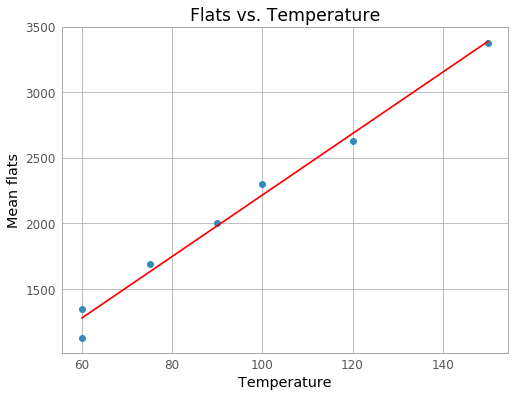

In [34]:
#mean of the group means

meanM = mean_flat.mean()
mean2 = mean_flat2.mean()
mean4 = mean_flat4.mean()
mean5 = mean_flat5.mean()
mean6 = mean_flat6.mean()
meanS = mean_flatS.mean()
meanT = mean_flatT.mean()

T_exposure = [60.,60.,75.,90.,100.,120.,150.]
arr_meanflats = [meanM, mean5, meanS, mean2, mean6, meanT, mean4]
plt.scatter(T_exposure,arr_meanflats)



def func (x,a,b):
    return np.float64(a)*np.float64(x)+np.float64(b)

# execute the curve fit...
coeffs, fiterr = curve_fit(func, T_exposure, arr_meanflats)

# ...and plot the results
#print ("a=%s, b=%s, c=%s" % (coeffs[0], coeffs[1], coeffs[2]))

plt.plot(T_exposure,arr_meanflats, '+')
plt.plot(T_exposure,func(T_exposure,*coeffs),'r')
plt.xlabel("Temperature")
plt.ylabel("Mean flats")
plt.title("Flats vs. Temperature")
plt.show()

# Dark Current

In [17]:
## temperature correlation: 1 is at -10 degrees
#                           2 is at -5 degrees
#                           3 is at 0 degrees
#                           4 is at 5 degrees
#                           5 is at 10 degrees


file_path_dark = "/Users/mebowen/Desktop/Group4/"

# read in the dark images
dark1 = []
dark1.append(fits.getdata(file_path_dark + "bDark00000003.fit" , ext=0).astype(np.int))
dark1.append(fits.getdata(file_path_dark + "bDark00000004.fit" , ext=0).astype(np.int))

dark2 = []
dark2.append(fits.getdata(file_path_dark + "bDark00000007.fit" , ext=0).astype(np.int))
dark2.append(fits.getdata(file_path_dark + "bDark00000008.fit" , ext=0).astype(np.int))

dark3 = []
dark3.append(fits.getdata(file_path_dark + "bDark00000011.fit" , ext=0).astype(np.int))
dark3.append(fits.getdata(file_path_dark + "bDark00000012.fit" , ext=0).astype(np.int))

dark4 = []
dark4.append(fits.getdata(file_path_dark + "bDark00000015.fit" , ext=0).astype(np.int))
dark4.append(fits.getdata(file_path_dark + "bDark00000016.fit" , ext=0).astype(np.int))

dark5 = []
dark5.append(fits.getdata(file_path_dark + "bDark00000019.fit" , ext=0).astype(np.int))
dark5.append(fits.getdata(file_path_dark + "bDark00000020.fit" , ext=0).astype(np.int))

# read in the biases
bias_dark1 = []
bias_dark1.append(fits.getdata(file_path_dark + "bBias00000001.fit" , ext=0).astype(np.int))
bias_dark1.append(fits.getdata(file_path_dark + "bBias00000002.fit" , ext=0).astype(np.int))

bias_dark2 = []
bias_dark2.append(fits.getdata(file_path_dark + "bBias00000005.fit" , ext=0).astype(np.int))
bias_dark2.append(fits.getdata(file_path_dark + "bBias00000006.fit" , ext=0).astype(np.int))

bias_dark3 = []
bias_dark3.append(fits.getdata(file_path_dark + "bBias00000009.fit" , ext=0).astype(np.int))
bias_dark3.append(fits.getdata(file_path_dark + "bBias00000010.fit" , ext=0).astype(np.int))

bias_dark4 = []
bias_dark4.append(fits.getdata(file_path_dark + "bBias00000013.fit" , ext=0).astype(np.int))
bias_dark4.append(fits.getdata(file_path_dark + "bBias00000014.fit" , ext=0).astype(np.int))

bias_dark5 = []
bias_dark5.append(fits.getdata(file_path_dark + "bBias00000017.fit" , ext=0).astype(np.int))
bias_dark5.append(fits.getdata(file_path_dark + "bBias00000018.fit" , ext=0).astype(np.int))

In [18]:
#taking the mean and variance of the dark biases at each temp
mean_bias_dark1 = np.asarray(bias_dark1).mean(axis=0)
var_bias_dark1 = np.asarray(bias_dark1).var(axis=0)

mean_bias_dark2 = np.asarray(bias_dark2).mean(axis=0)
var_bias_dark2 = np.asarray(bias_dark2).var(axis=0)

mean_bias_dark3 = np.asarray(bias_dark3).mean(axis=0)
var_bias_dark3 = np.asarray(bias_dark3).var(axis=0)

mean_bias_dark4 = np.asarray(bias_dark4).mean(axis=0)
var_bias_dark4 = np.asarray(bias_dark4).var(axis=0)

mean_bias_dark5 = np.asarray(bias_dark5).mean(axis=0)
var_bias_dark5 = np.asarray(bias_dark5).var(axis=0)


# subtracting average of dark bias frame from each dark at each temp
d_sub_bias1 = [d1 - mean_bias_dark1 for d1 in dark1]
d_sub_bias2 = [d2 - mean_bias_dark2 for d2 in dark2]
d_sub_bias3 = [d3 - mean_bias_dark3 for d3 in dark3]
d_sub_bias4 = [d4 - mean_bias_dark4 for d4 in dark4]
d_sub_bias5 = [d5 - mean_bias_dark5 for d5 in dark5]


#taking the mean and variance of the darks at each temp
mean_dark1 = np.asarray(d_sub_bias1).mean(axis=0)
var_dark1 = np.asarray(d_sub_bias1).var(axis=0)

mean_dark2 = np.asarray(d_sub_bias2).mean(axis=0)
var_dark2 = np.asarray(d_sub_bias2).var(axis=0)

mean_dark3 = np.asarray(d_sub_bias3).mean(axis=0)
var_dark3 = np.asarray(d_sub_bias3).var(axis=0)

mean_dark4 = np.asarray(d_sub_bias4).mean(axis=0)
var_dark4 = np.asarray(d_sub_bias4).var(axis=0)

mean_dark5 = np.asarray(d_sub_bias5).mean(axis=0)
var_dark5 = np.asarray(d_sub_bias5).var(axis=0)

a=4.26361778061, b=0.149445444301, c=0.575906123787


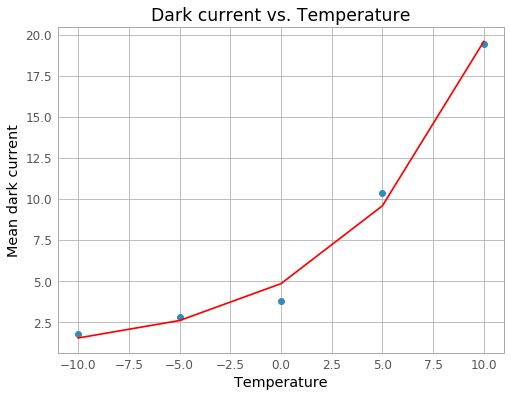

In [35]:
#mean of the group means

mean1 = mean_dark1.mean()
mean2 = mean_dark2.mean()
mean3 = mean_dark3.mean()
mean4 = mean_dark4.mean()
mean5 = mean_dark5.mean()


T_dark = [-10.,-5.,0.,5.,10.]
arr_meandarks = [mean1, mean2, mean3, mean4, mean5]
plt.scatter(T_dark,arr_meandarks)


def func (x,a,b,c):
    return np.float64(a)*np.exp(np.float64(b)*np.float64(x))+np.float64(c)  #exponential
    #return np.float64(a)*np.float64(x)+np.float64(b)  this was linear

# execute the curve fit...
coeffs, fiterr = curve_fit(func, T_dark, arr_meandarks)

# ...and plot the results
print ("a=%s, b=%s, c=%s" % (coeffs[0], coeffs[1], coeffs[2]))

plt.plot(T_dark,arr_meandarks, '+')
plt.plot(T_dark,func(T_dark,*coeffs),'r')
plt.xlabel("Temperature")
plt.ylabel("Mean dark current")
plt.title("Dark current vs. Temperature")
plt.show()

